# Project, Crop recommendation

*The goals*

*To make data-driven recommendations for achieving optimal nutrient and environmental conditions to improve crop yield.*

In [1]:
import pandas as pd 
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

%matplotlib inline
sns.set()

**Read the data**

In [2]:
crop = pd.read_csv('Crop_recommendation.csv')

In [3]:
crop.head()

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,label,Unnamed: 8,Unnamed: 9
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,NaN,NaN
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,NaN,NaN
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,NaN,NaN
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,NaN,NaN
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,NaN,NaN


Step 2: Prepare

In [4]:
crop.shape

(2200, 10)

In [5]:
crop.dtypes

Nitrogen         int64
phosphorus       int64
potassium        int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
Unnamed: 8     float64
Unnamed: 9     float64
dtype: object

In [6]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     2200 non-null   int64  
 1   phosphorus   2200 non-null   int64  
 2   potassium    2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
 8   Unnamed: 8   0 non-null      float64
 9   Unnamed: 9   0 non-null      float64
dtypes: float64(6), int64(3), object(1)
memory usage: 172.0+ KB


In [7]:
crop.isnull().any()

Nitrogen       False
phosphorus     False
potassium      False
temperature    False
humidity       False
ph             False
rainfall       False
label          False
Unnamed: 8      True
Unnamed: 9      True
dtype: bool

In [8]:
crop['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

<AxesSubplot:ylabel='Frequency'>

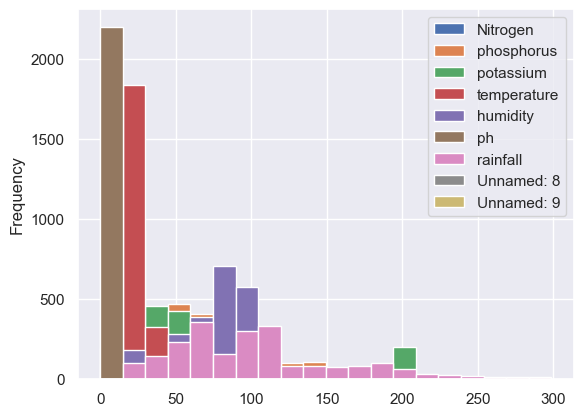

In [9]:
crop.plot.hist(bins=20)

In [10]:
crop.describe()

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,Unnamed: 8,Unnamed: 9
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,0.0,0.0
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655,NaN,NaN
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389,NaN,NaN
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267,NaN,NaN
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686,NaN,NaN
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624,NaN,NaN
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508,NaN,NaN
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117,NaN,NaN


**Clean data**

In [11]:
clean_crop = crop.dropna(axis = 'columns')

In [12]:
clean_crop.head()

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


C:\Users\User\AppData\Local\Temp\ipykernel_7152\3785342067.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(clean_crop.corr(), annot=True, cmap='coolwarm')


<AxesSubplot:>

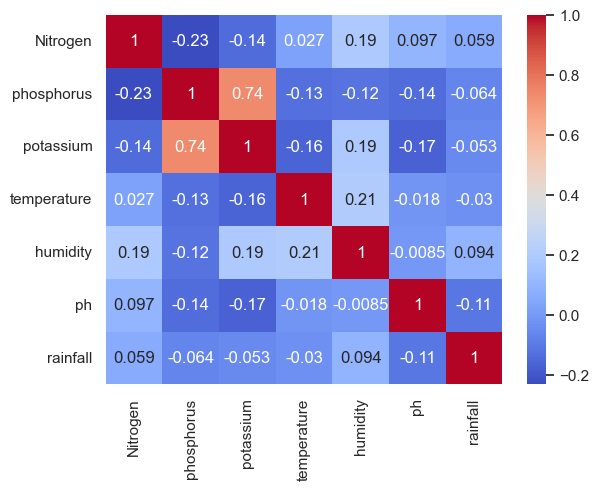

In [13]:
sns.heatmap(clean_crop.corr(), annot=True, cmap='coolwarm')

##  Step 3: Analyze

In [14]:
X = clean_crop.drop('label', axis=1)
y = clean_crop['label']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.7, random_state=42)

In [16]:
stand = StandardScaler().fit(X_train)

X_train_stand = stand.transform(X_train)
X_test_stand = stand.transform(X_test)

In [17]:
score = []

X_trains = [X_train, X_train_stand]
X_tests = [X_test, X_test_stand]

In [18]:
for X_train_set, X_test_set in zip(X_trains, X_tests):
    svc = SVC()
    svc.fit(X_train_set, y_train)
    y_pred = svc.predict(X_test_set)
    score.append(accuracy_score(y_test, y_pred))

In [19]:
pd.DataFrame({'accuracy score': score}, index=['Original', 'Standardized'])

,accuracy score
Original,0.951299
Standardized,0.968182


**Finding most important feature for crop yield**

In [20]:
svc = SVC()
svc.fit(X_train_stand, y_train)

perm_importance = permutation_importance(svc, X_test_stand, y_test)
perm_importance.importances_mean

array([0.29272727, 0.22233766, 0.18753247, 0.14545455, 0.37883117,
       0.09      , 0.33987013])

 **Visualize the results**

<AxesSubplot:>

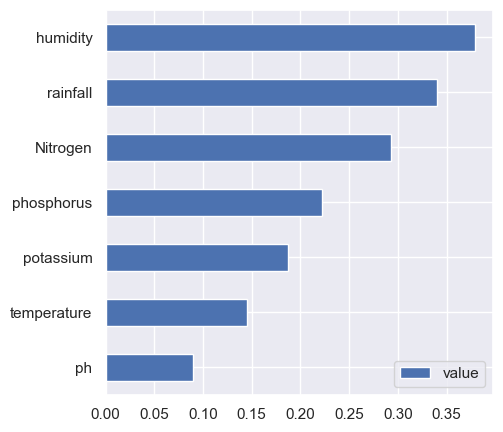

In [21]:
sorted_idx = perm_importance.importances_mean.argsort()
df = pd.DataFrame(perm_importance.importances_mean[sorted_idx], X_test.columns[sorted_idx], columns=['value'])

df.plot.barh(figsize=[5, 5])

<AxesSubplot:xlabel='label'>

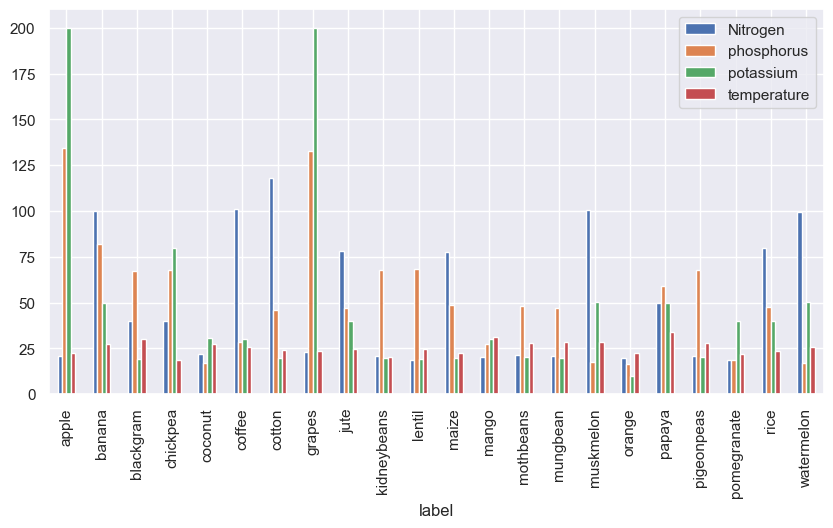

In [22]:
clean_crop.groupby('label').mean()[['Nitrogen','phosphorus','potassium','temperature']].plot.bar(figsize=(10,5))

<AxesSubplot:xlabel='label'>

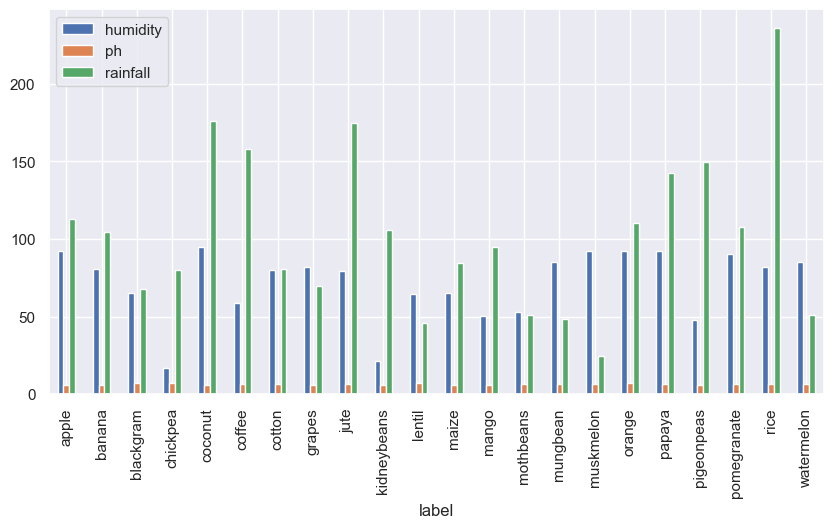

In [23]:
clean_crop.groupby('label').mean()[['humidity','ph','rainfall']].plot.bar(figsize=(10,5))

# Report

*Present Findings*

<AxesSubplot:>

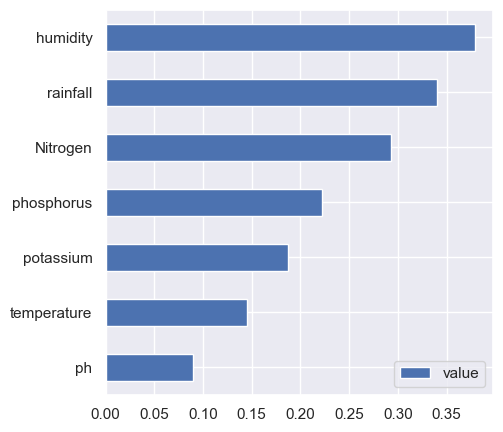

In [24]:
sorted_idx = perm_importance.importances_mean.argsort()
df = pd.DataFrame(perm_importance.importances_mean[sorted_idx], X_test.columns[sorted_idx], columns=['value'])

df.plot.barh(figsize=[5, 5])

# Credibility Counts

In [ ]:
# recommendations for achieving optimal nutrient and environmental conditions to improve all crop yield
- Rainfall  
- potassium 
- phosphorus
- humidity 
- rainfall
- nitrogen 

# Actions

**Use Insights**

In [ ]:
# my insights 
  #recommendations for achieving optimal nutrient and environmental conditions to improve all crop yield

#- all crops need more nutrient from humidity to get yield.
#- most crops need more nutrient from rainfall, why some crops need less rainfall to get yield.
#- most crops need more nutrient from nitrogen, why some crops need less nitrogen to get yield.
#- some crops need more phosphorus to get nutrient like 50% to get yield, most crosps  need less phosphorus like 20% yild to get yield.
#- few crops e.g applle and grapes need 75 to 80 percent of potassium to get yield, some crops need 40 percent of potassium to get yied 
   